
# Multiple Linear Regression Analysis on Iris Dataset


## Dataset Description
The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers: setosa, versicolor, and virginica. For this analysis, we are specifically interested in sepal length and petal length as the independent variables and petal width as the dependent variable.
- The dataset contains 150 observations, 50 for each species. 
- The Source Code utilized is from the Book:  **`Bayesian Analysis with Python Second Edition`**  by **`Osvaldo Martin`**.
- The dataset is available at ``https://archive.ics.uci.edu/ml/datasets/iris``.

In [ ]:
import pandas as pd
import numpy as np
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

iris = pd.read_csv("iris.csv")

sepal_length = iris['SepalLengthCm']
petal_length = iris['PetalLengthCm']
petal_width = iris['PetalWidthCm']


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Plotting the Data

### Petal Length vs Petal Width

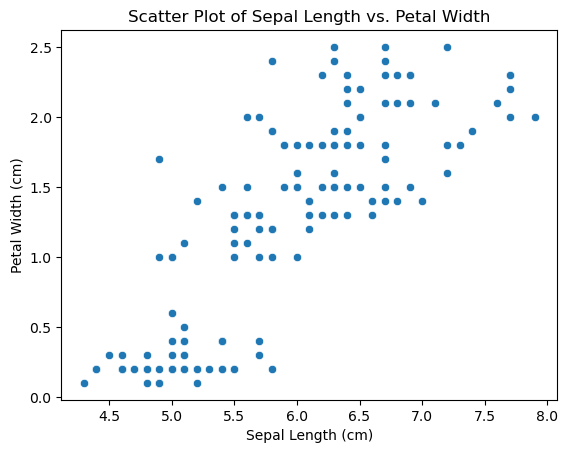

In [ ]:

sns.scatterplot(x=sepal_length, y=petal_width)
plt.title('Scatter Plot of Sepal Length vs. Petal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


### Sepal Length vs Petal Width

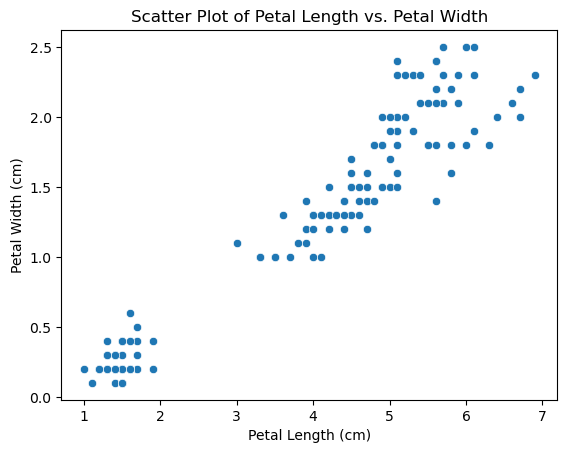

In [ ]:

sns.scatterplot(x=petal_length, y=petal_width)
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


### Sepal Length vs Petal Length

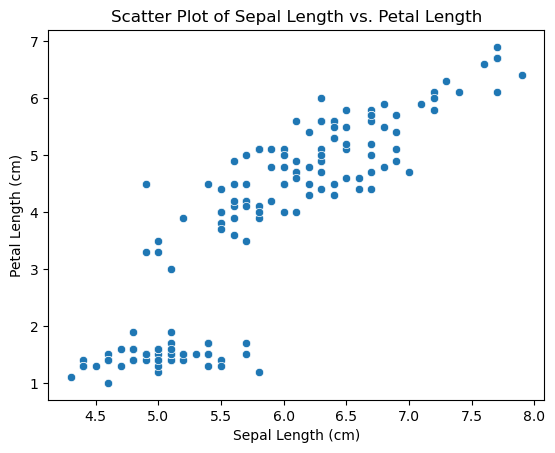

In [ ]:
sns.scatterplot(x=sepal_length, y=petal_length)
plt.title('Scatter Plot of Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

## Creating The Linear Regression Models

In [ ]:
X = iris[['SepalLengthCm', 'PetalLengthCm']].values
y = iris['PetalWidthCm'].values

 - β1 indicates Petal Length
 - β2 indicates Sepal Length

### Petal Length as X and Petal Width as Y

In [ ]:

trace_petal = None

with pm.Model() as petal_length_model:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α + β1 * X[:, 1]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_petal = pm.sample(2000)



c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β1, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 49 seconds.
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


### Sepal Length as X and Petal Width as Y

In [ ]:

trace_sepal = None

with pm.Model() as sepal_length_model:
    α = pm.Normal('α', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α + β2 * X[:, 0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_sepal = pm.sample(2000)

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β2, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 59 seconds.
The acceptance probability does not match the target. It is 0.8834077699860049, but should be close to 0.8. Try to increase the number of tuning steps.


## Creating The Multiple Linear Regression Model

- as the multiple regression line has formula : y = α + β1x1 + β2x2 + ... + βnxn

In [ ]:

trace = None

with pm.Model() as multiple_linear_model:

    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α + β1 * X[:, 1] + β2 * X[:, 0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace = pm.sample(2000)


c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β2, β1, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 85 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 266 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5848052392792625, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


## Model Evaluation

### Model Summary

##### Estimating our Model Parameters

C:\Users\ahmad\AppData\Local\Temp\ipykernel_10416\4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour

array([[<Axes: title={'center': 'α'}>, <Axes: title={'center': 'α'}>],
       [<Axes: title={'center': 'β1'}>, <Axes: title={'center': 'β1'}>],
       [<Axes: title={'center': 'β2'}>, <Axes: title={'center': 'β2'}>],
       [<Axes: title={'center': 'ϵ'}>, <Axes: title={'center': 'ϵ'}>]],
      dtype=object)

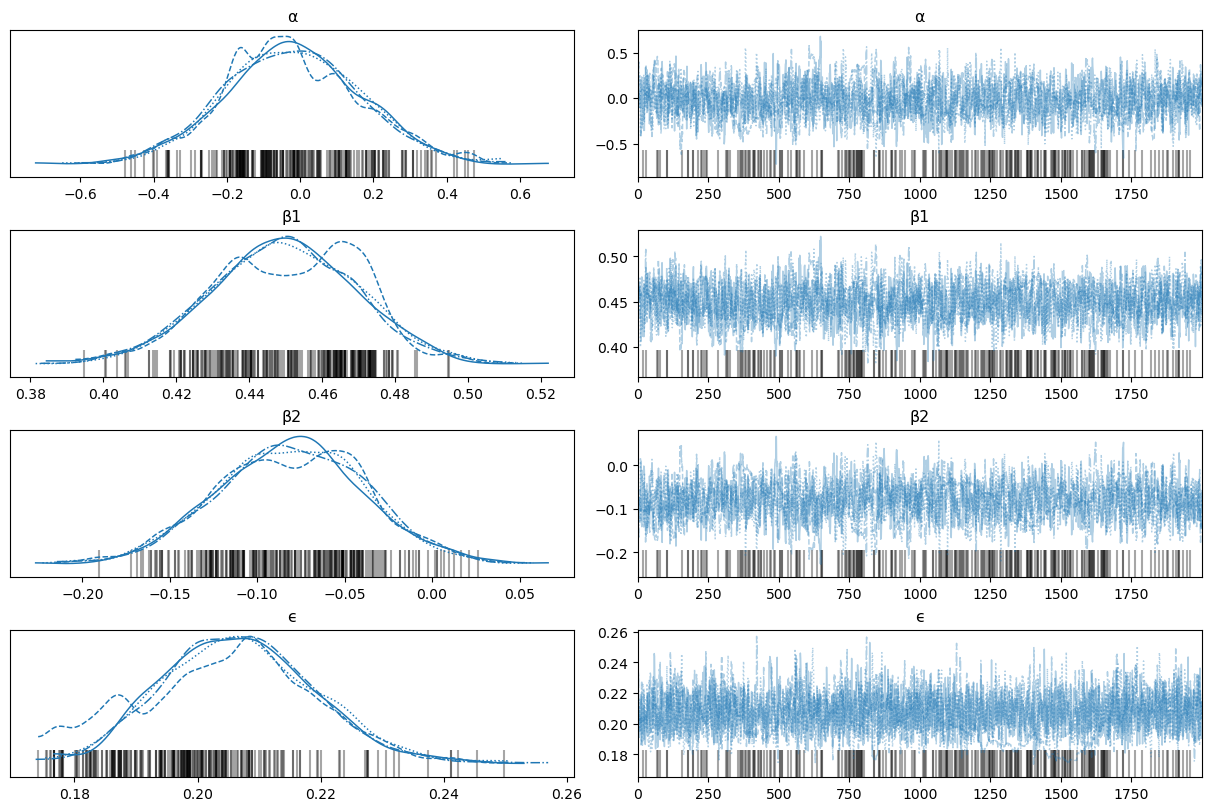

In [ ]:
pm.traceplot(trace)

#### Summary of the Posterior

In [ ]:
varnames = ['α', 'β1', 'β2', 'ϵ']
az.summary(trace, var_names=varnames)

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-0.021,0.186,-0.372,0.329,0.009,0.006,471.0,1028.0,1.00
β1,0.450,0.020,0.412,0.486,0.001,0.001,429.0,1513.0,1.00
β2,-0.081,0.042,-0.163,-0.005,0.002,0.001,431.0,1143.0,1.00
ϵ,0.206,0.013,0.182,0.230,0.001,0.001,105.0,86.0,1.04


### Plotting the Multiple Regression Model using Posterior Predictive Distribution

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


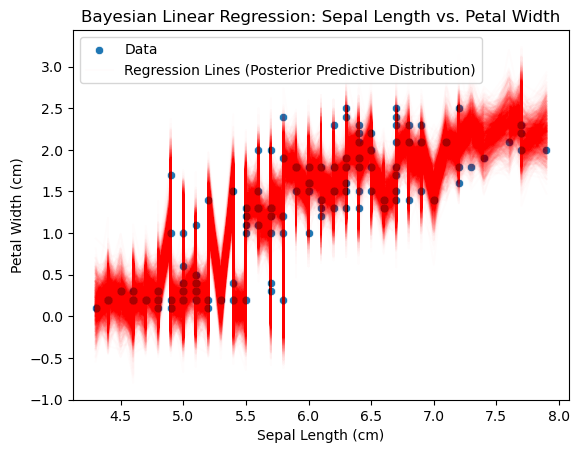

In [ ]:
posterior_samples = pm.sample_posterior_predictive(trace, samples=2000, model=multiple_linear_model)

plt.figure()
sns.scatterplot(x=iris['SepalLengthCm'], y=iris['PetalWidthCm'], label="Data")

# Displaying the regression lines using posterior samples
for i in range(len(posterior_samples['y_pred'])):
    y_pred = posterior_samples['y_pred'][i]
    x_sort_idx = np.argsort(X[:, 0])
    plt.plot(X[x_sort_idx, 0], y_pred[x_sort_idx], color='red', alpha=0.01)
    
plt.title('Bayesian Linear Regression: Sepal Length vs. Petal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(['Data', 'Regression Lines (Posterior Predictive Distribution)'])
plt.show()


### Confounding Variables in this Model


#### Utlizing the Forest Plot to Visualize the Posterior Distribution of the Model Parameters

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

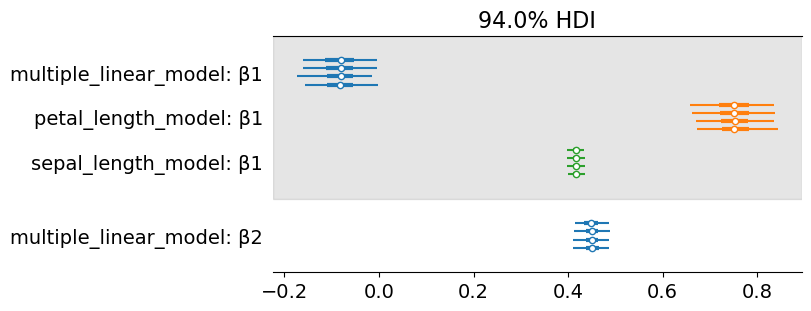

In [ ]:
az.plot_forest([trace, trace_sepal, trace_petal],
 model_names=['multiple_linear_model', 'petal_length_model', 'sepal_length_model'],
 var_names=['β1', 'β2'],
 combined=False, colors='cycle', figsize=(8, 3))


#### Conclusion

- In this case, we know that in the Multiple Linear Model, `β1` represents the change in the dependent variable (`petal width`) for a one-unit change in the independent variable (`petal length`) while holding the other independent variable (`sepal length`) constant.
- However, we can see from the forest plot that the 94% credible interval for `β1` includes zero for the multiple linear model. 
- Even though in the model for petal length, the `β1` indicates a strong relationship with petal length.
- This indicates a` NULL relationship` for petal_length_model to explain the multiple_linear model.
- This means that we cannot be confident that there is a relationship between petal length and petal width when we hold sepal length constant.
- On the other hand, `β2` shows a `moderate relationship` `(of 0.45)` between petal length and petal width when we hold sepal length constant (the multiple linear model).
- That is given by the forest plot when the multiple linear model is plotted for `β2` in the multiple linear model.

> Hence we  can say, **`Sepal Length`** is a Confounding Variable in this case

### MultiColinearity in this Model

#### Pair Plotting to check for Multicolinearity

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


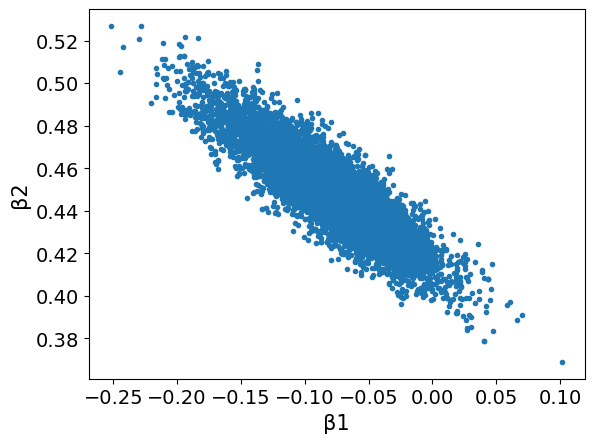

In [ ]:
az.plot_pair(trace, var_names=['β1', 'β2'])
plt.show()

#### Forest Plotting to check for Multicolinearity

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

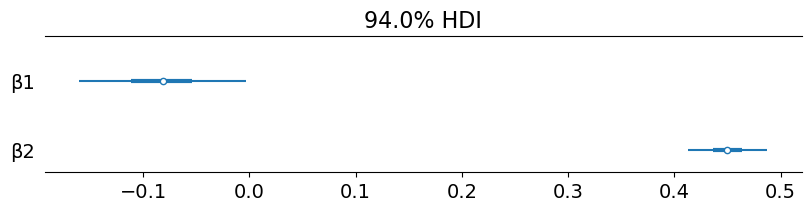

In [ ]:
az.plot_forest(trace, var_names=['β1','β2'], combined=True, figsize=(8,2))

#### Conclusion
- The Scatter Plot suggests that there is a linear relationship between `sepal length` and `petal length`.
- The Forest Plot shows that the 94% credible interval for `β1` includes `zero`.
- This implies that there is a relationship between `petal length` and `sepal length`.
- From the example in the book, we see that MultiColinearity is present when the forest plot indicates that the HPD for coefficients is suspiciously wide, which is not the case here.
- Even though the Scatter Plot's suggestion of a linear relationship between `sepal length` and `petal length`,
    - It is ` not narrow ` enough to be considered a `strong linear relationship`
    - The Forest Plot `does not` indicate MultiColinearity.

Therefore,
> This indicates that there is **No** **Collinearity** between the independent variables `petal length` and `sepal length`.